**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [2]:
from sklearn.neighbors import KDTree
from scipy.spatial import distance

def get_best_ranks(ranks, top=2):
    indices = np.argpartition(ranks, top, axis=1)[:,:top]
    ranks_top = np.take_along_axis(ranks, indices, axis=1)
    indices = np.take_along_axis(indices, ranks_top.argsort(axis=1), axis=1)
    return indices 


    
class MyKNeighborsClassifier(BaseEstimator):
    def __init__(self, n_neighbors, algorithm='brute',metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    def fit(self, X, y):
        self.X = X
        self.y = y
    def predict(self, X):
        k = self.n_neighbors
        X_ = self.X
        y_ = self.y
        y_pred = np.array([])
        
        if self.algorithm == 'brute':
#             print("FLAG-2")
            dist = distance.cdist(X, X_, metric=self.metric)
            indices = get_best_ranks(dist,top=k)
            y_pred = np.apply_along_axis(self._vote, 1, indices)

        elif self.algorithm == 'kd_tree':
#             print("FLAG-1")
            tree = KDTree(X_, metric='euclidean')              
            _, indices = tree.query(X, k=k)  
            y_pred = np.apply_along_axis(self._vote, 1, indices)
        else:
            print("ERROR")
        return y_pred
    def _vote(self, a):
        vote_array = self.y[a]
        vote_count = np.bincount(vote_array)
        vote_result = vote_count.argmax()
        return vote_result

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [6]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [7]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [8]:
%time clf.fit(X_train, y_train)

CPU times: user 1.01 ms, sys: 114 µs, total: 1.12 ms
Wall time: 958 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [9]:
%time my_clf.fit(X_train, y_train)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.34 µs


In [10]:
%time clf.predict(X_test)

CPU times: user 3.53 ms, sys: 0 ns, total: 3.53 ms
Wall time: 3.27 ms


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2])

In [11]:
%time my_clf.predict(X_test)

CPU times: user 903 µs, sys: 104 µs, total: 1.01 ms
Wall time: 1.02 ms


array([1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [12]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
%time clf.fit(X_train, y_train)

CPU times: user 1.45 ms, sys: 171 µs, total: 1.62 ms
Wall time: 1.35 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
%time my_clf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.78 µs


In [16]:
%time clf.predict(X_test)

CPU times: user 3.81 ms, sys: 0 ns, total: 3.81 ms
Wall time: 3.17 ms


array([2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0])

In [17]:
%time my_clf.predict(X_test)

CPU times: user 1.21 ms, sys: 0 ns, total: 1.21 ms
Wall time: 928 µs


array([2, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0])

In [18]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(max_features=5_000, stop_words='english')
vectorizer = CountVectorizer(max_df=500, min_df=2, max_features=500, stop_words='english', lowercase=True)
# vectorizer = CountVectorizer(max_df=500, min_df=2, max_features=500, lowercase=True)
X = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold

folds = 3
kf = KFold(n_splits=folds, shuffle=True)
kf.get_n_splits(X)

3

In [23]:
def cv(kf, knn_model, X, y, verbose=False):
    total_score = 0
    for train_index, test_index in kf.split(X):
        if verbose:
            print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn_model.fit(X_train.toarray(), y_train)
        knn_pred = knn_model.predict(X_test.toarray())
        total_score += accuracy_score(y_test, knn_pred)
        if verbose:
            print("score:", accuracy_score(y_test, knn_pred))
            print()
    mean_score = total_score/folds
    if verbose:
        print("MEAN_SCORE:", mean_score)
    return mean_score

# n_neighbors = 2
# knn = MyKNeighborsClassifier(n_neighbors=n_neighbors)
# cv(kf,knn,X,target,verbose=True)

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [24]:
def grid_cv_for_MyKNN(kf, k_variants, X,y, verbose=False, algorithm='brute',  metric='cosine'):
    scores = np.array([])
    for k in k_variants:
        n_neighbors = k
        if verbose:
            print("n_neighbors:", n_neighbors)
        knn = MyKNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm, metric=metric)

        curr_mean_score = cv(kf,knn,X,y,verbose=False)
        scores = np.append(scores, curr_mean_score)
        if verbose:
            print("mean score:", curr_mean_score)
            print()
    best_score = scores.max()
    best_param = k_variants[scores.argmax()]
    if verbose:
        print("BEST SCORE:\t", best_score)
        print("BEST k:\t\t", best_param)
    return best_score, best_param, scores

In [25]:
_,_,scores = grid_cv_for_MyKNN(kf, range(2,11), X, target, verbose=True, metric='euclidean')

n_neighbors: 2
mean score: 0.2572033515810929

n_neighbors: 3
mean score: 0.26842822646344133

n_neighbors: 4
mean score: 0.279034930019322

n_neighbors: 5
mean score: 0.2847797356601078

n_neighbors: 6
mean score: 0.2908780230965811

n_neighbors: 7
mean score: 0.2843382349288195

n_neighbors: 8
mean score: 0.2916724666364647

n_neighbors: 9
mean score: 0.2914090425536402

n_neighbors: 10
mean score: 0.29299931225247017

BEST SCORE:	 0.29299931225247017
BEST k:		 10


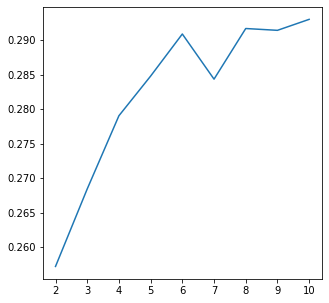

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
# plt.axis('equal')
plt.plot(range(2,11), scores)
plt.show()

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [27]:
grid_cv_for_MyKNN(kf,range(8,11),X,target,verbose=True, metric='cosine')

n_neighbors: 8
mean score: 0.37184037564494493

n_neighbors: 9
mean score: 0.3837724484608825

n_neighbors: 10
mean score: 0.38509823953692485

BEST SCORE:	 0.38509823953692485
BEST k:		 10


(0.38509823953692485, 10, array([0.37184038, 0.38377245, 0.38509824]))

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000, min_df=20, max_df=1000,\
                             stop_words='english', token_pattern='\w*[a-zA-Z]\w+')
X = vectorizer.fit_transform(data)

folds = 3
kf = KFold(n_splits=folds, shuffle=True)
kf.get_n_splits(X)

grid_cv_for_MyKNN(kf, range(8,11), X, target, verbose=True, metric='cosine')

n_neighbors: 8
mean score: 0.5374758193986423

n_neighbors: 9
mean score: 0.5417181633682063

n_neighbors: 10
mean score: 0.5483471656168604

BEST SCORE:	 0.5483471656168604
BEST k:		 10


(0.5483471656168604, 10, array([0.53747582, 0.54171816, 0.54834717]))

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [29]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [30]:
vectorizer = TfidfVectorizer(max_features=2000, min_df=20, max_df=1000,\
                             stop_words='english', token_pattern='\w*[a-zA-Z]\w+')
X_best = vectorizer.fit_transform(data)

best_k=10
knn_best = MyKNeighborsClassifier(n_neighbors=best_k, algorithm='brute', metric='cosine')
knn_best.fit(X_best.toarray(), target)

In [31]:
data_test = newsgroups['data']
target_test = newsgroups['target']
X_test = vectorizer.fit_transform(data_test)

knn_pred_test = knn_best.predict(X_test.toarray())
accuracy_score(target_test, knn_pred_test)

0.09904407859798195